In [65]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.svm import SVC as svm
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

UWU ARIGATO NANDESU


In [66]:
data = pd.read_csv("./covtype.csv")
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [67]:
#Definimos la función de evaluación del modelo
def cross_validate(model, X, y, k):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = []
    y_pred=0
    for train_index, test_index in kf.split(X):
        # Cambia esto para usar .iloc, ya que X es un DataFrame de pandas
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # También usamos iloc para y
        
        
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred)
        clr = classification_report(y_test, y_pred)
    
        plt.figure(figsize=(8, 8))
        sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    
        print("Classification Report:\n----------------------\n", clr)
        cm = confusion_matrix(y_test, y_pred)
        
    return np.mean(scores), scores, model

PERCEPTRON



In [68]:
df= {
    "head": data.head(),
    "columns": data.columns.tolist(),
    "shape": data.shape,
    "info": data.info(buf=None)
}

df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

{'head':    Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
 0       2596      51      3                               258   
 1       2590      56      2                               212   
 2       2804     139      9                               268   
 3       2785     155     18                               242   
 4       2595      45      2                               153   
 
    Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
 0                               0                              510   
 1                              -6                              390   
 2                              65                             3180   
 3                             118                             3090   
 4                              -1                              391   
 
    Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
 0            221             232            148   
 1            220             235            151   
 2        

GRÁFICA

C:\Users\reyra\AppData\Local\Temp\ipykernel_17448\3424938550.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=soil_totals.index, y=soil_totals.values, palette="viridis")


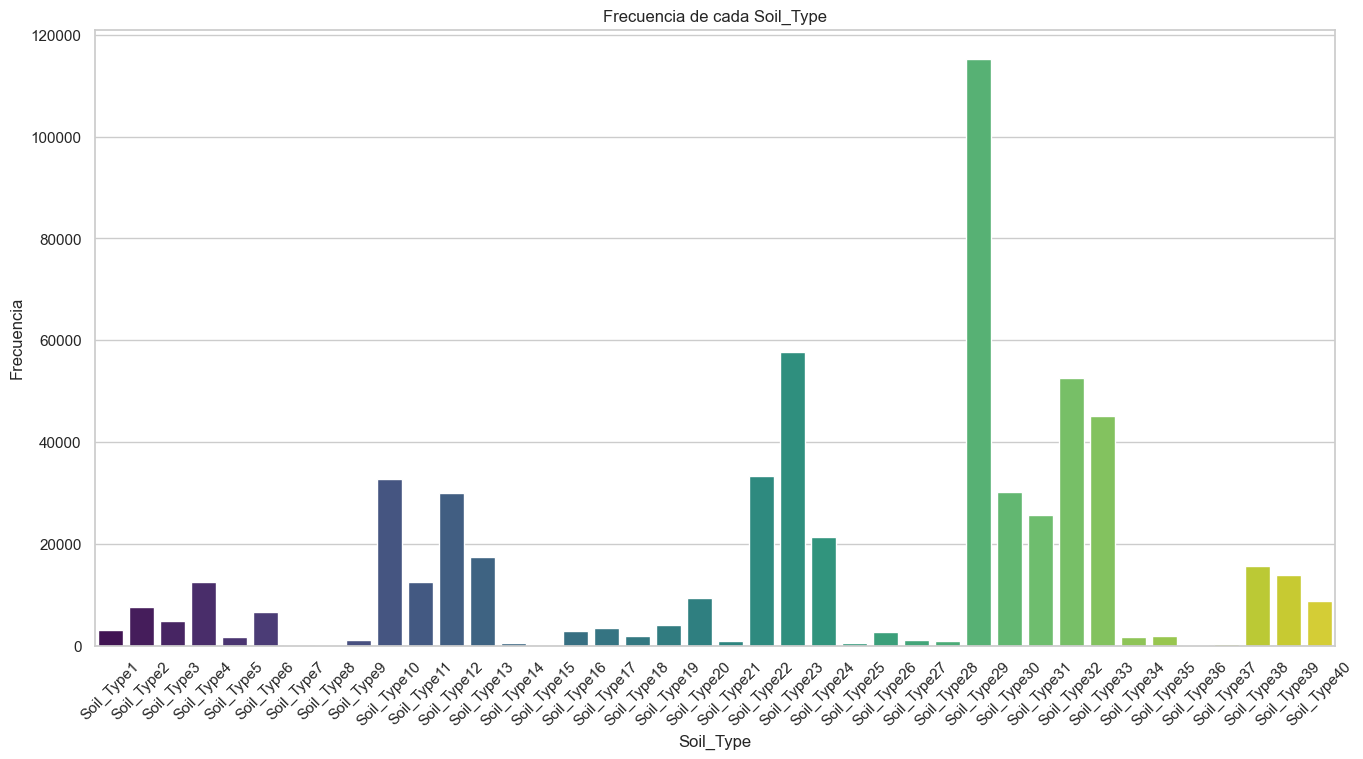

C:\Users\reyra\AppData\Local\Temp\ipykernel_17448\3424938550.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wilderness_totals.index, y=wilderness_totals.values, palette="viridis")


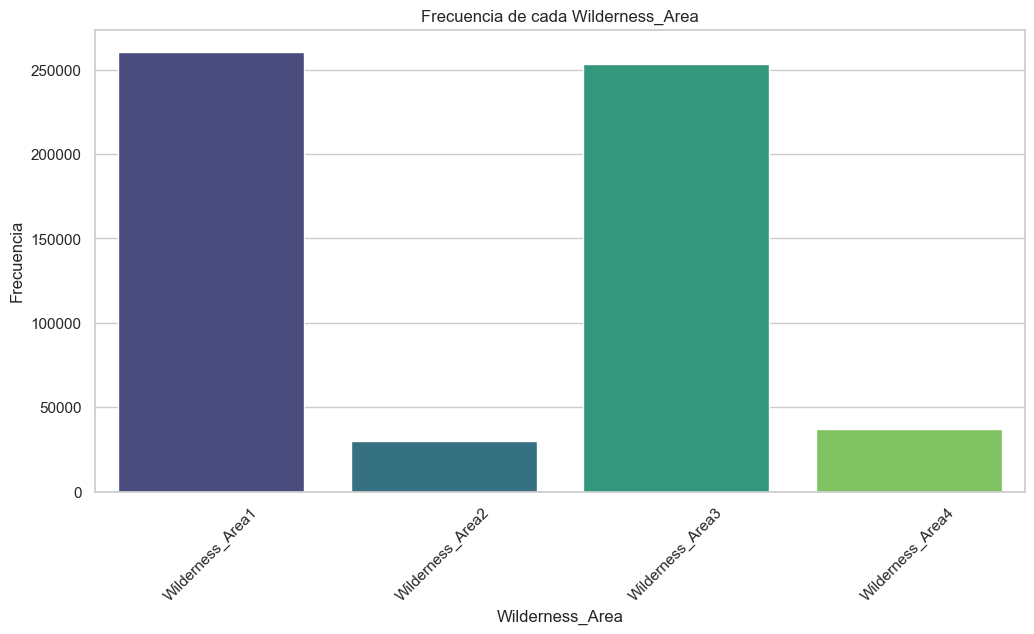

In [69]:
# Obtener información general sobre los datos
# Configuración general de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (16, 8)

# Seleccionar columnas Soil_Type
soil_columns = [col for col in data.columns if col.startswith('Soil_Type')]

# Graficar cada columna Soil_Type por separado en una misma gráfica
soil_data = data[soil_columns]

# Crear un DataFrame con los valores totales para cada Soil_Type
soil_totals = soil_data.sum()

# Graficar barras individuales para cada Soil_Type
plt.figure()
sns.barplot(x=soil_totals.index, y=soil_totals.values, palette="viridis")
plt.title('Frecuencia de cada Soil_Type')
plt.xlabel('Soil_Type')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()
# Configuración general de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Seleccionar columnas Wilderness_Area
wilderness_columns = [col for col in data.columns if col.startswith('Wilderness_Area')]

# Graficar cada columna Wilderness_Area por separado en una misma gráfica
wilderness_data = data[wilderness_columns]

# Crear un DataFrame con los valores totales para cada Wilderness_Area
wilderness_totals = wilderness_data.sum()

# Graficar barras individuales para cada Wilderness_Area
plt.figure()
sns.barplot(x=wilderness_totals.index, y=wilderness_totals.values, palette="viridis")
plt.title('Frecuencia de cada Wilderness_Area')
plt.xlabel('Wilderness_Area')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

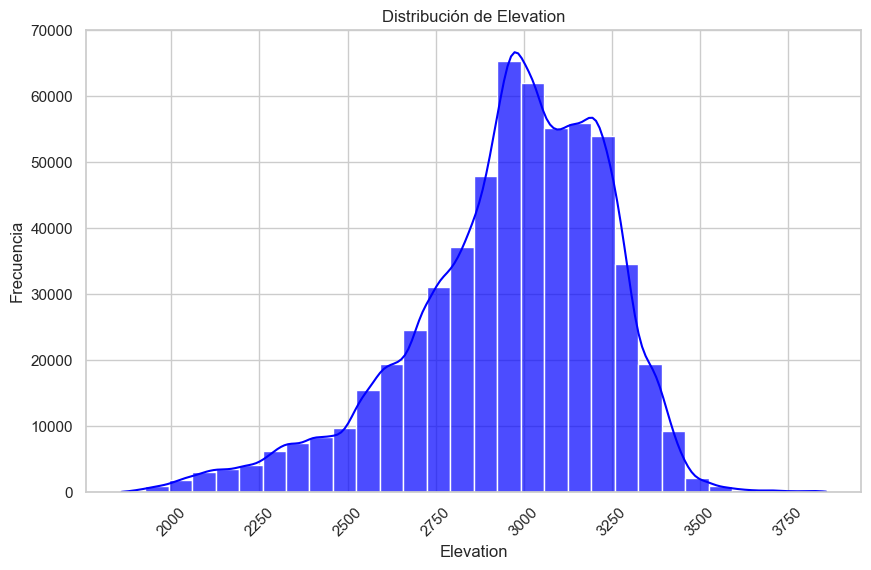

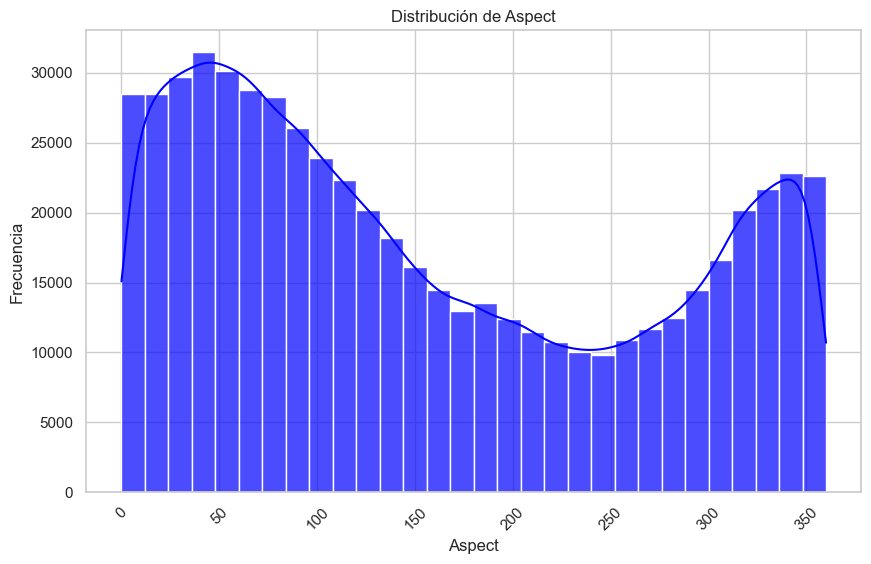

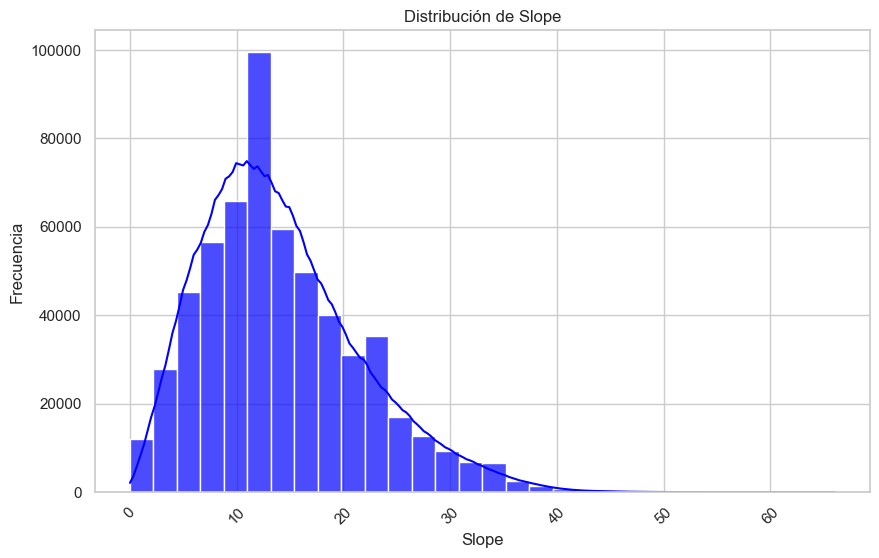

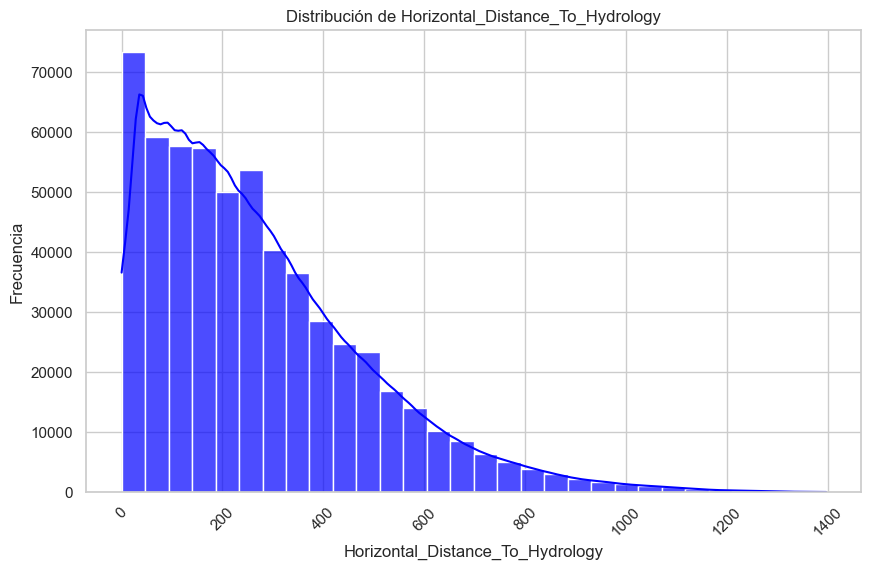

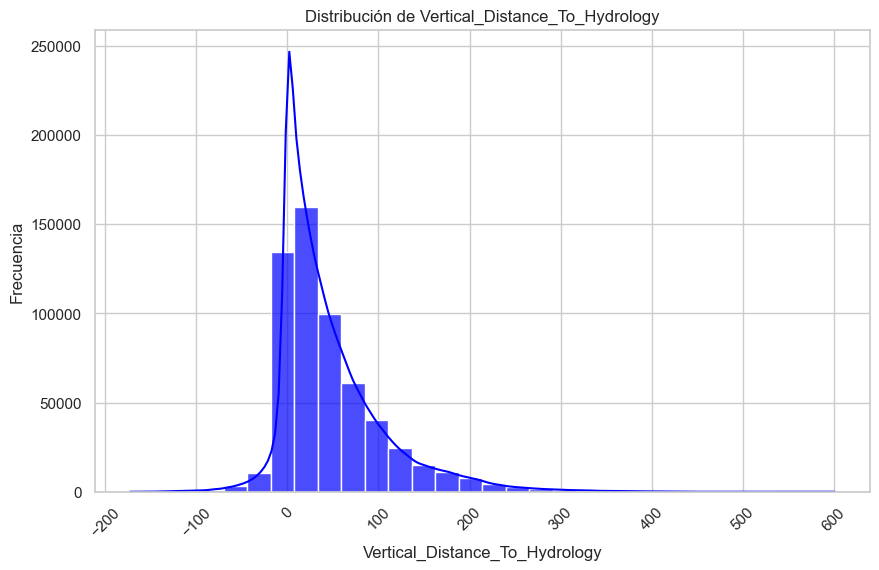

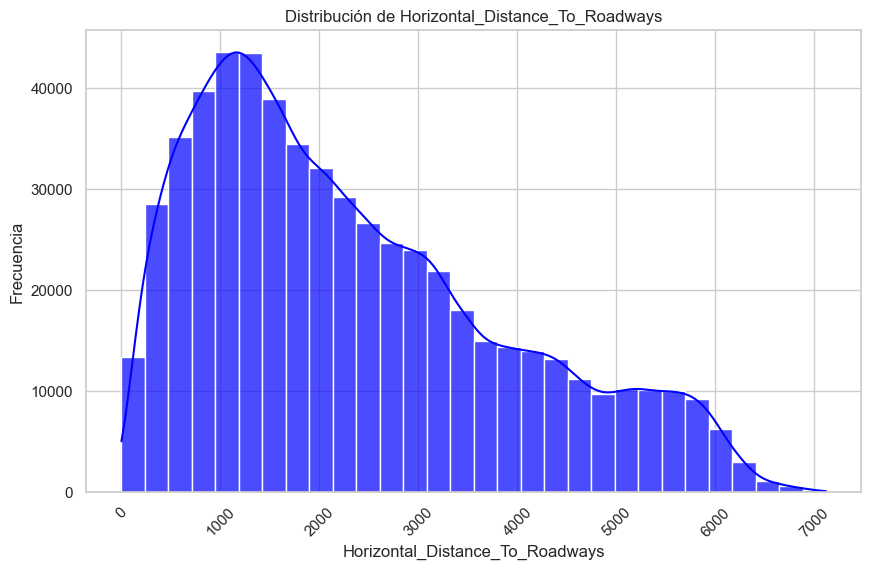

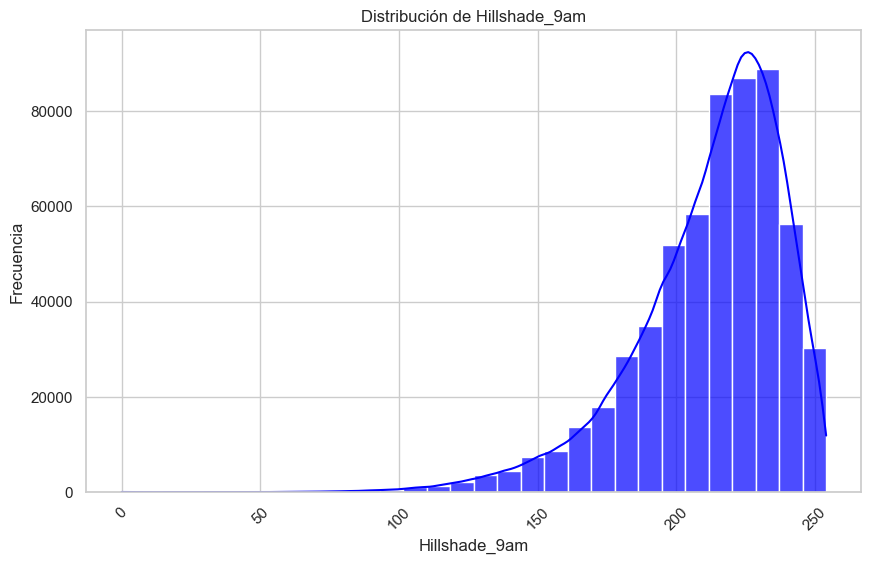

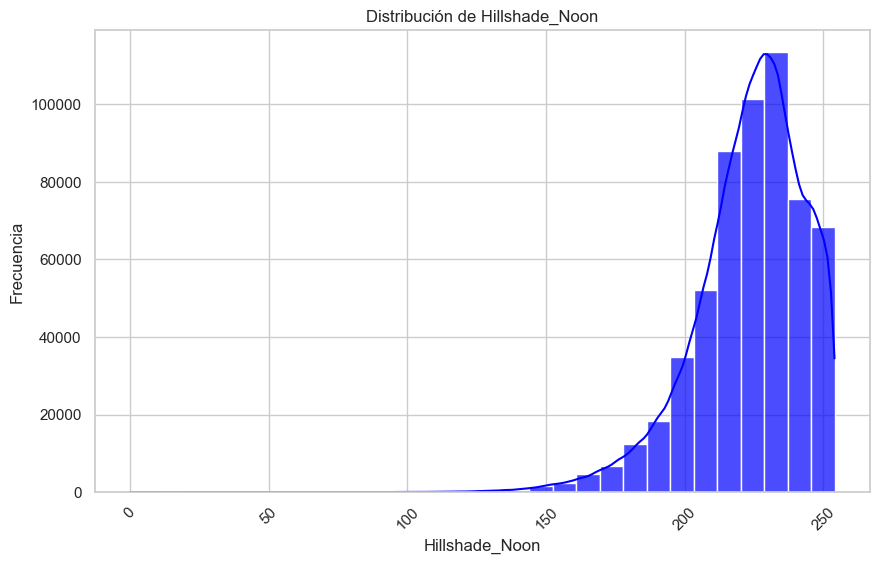

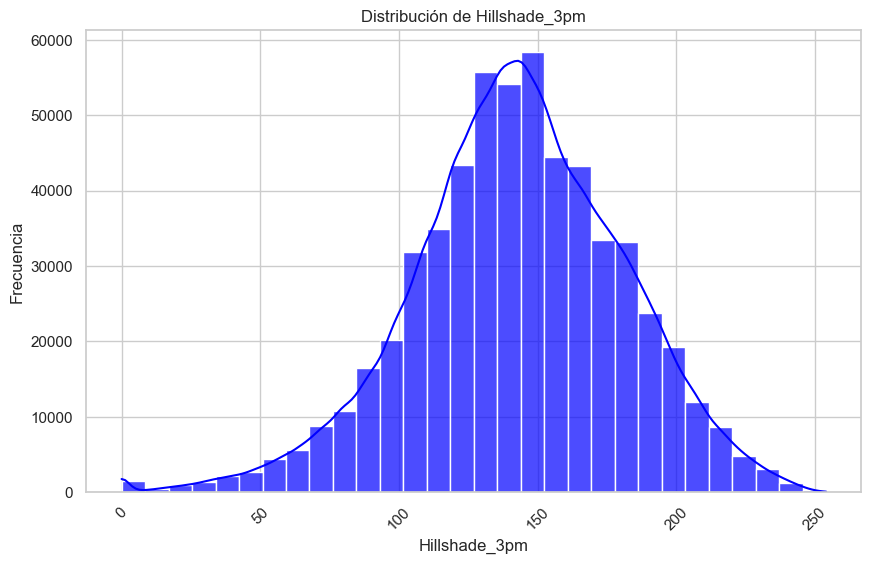

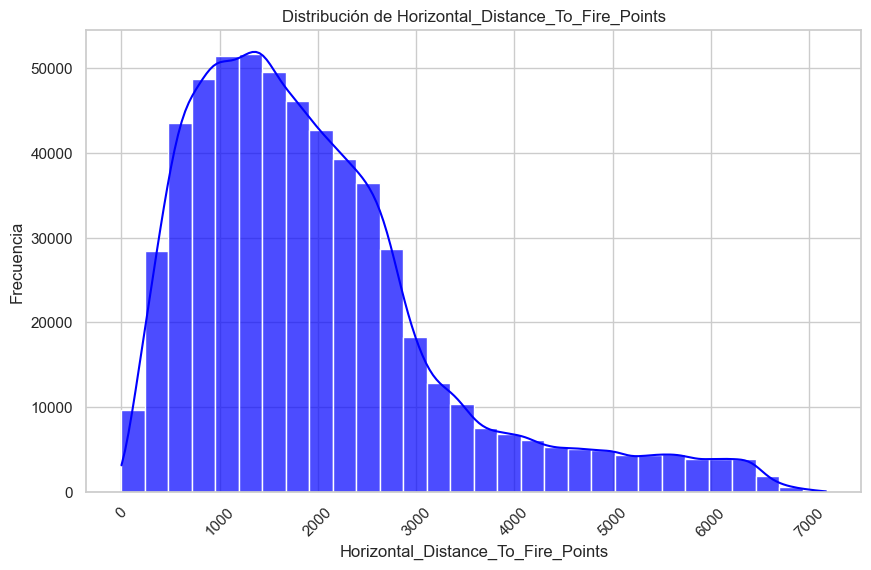

C:\Users\reyra\AppData\Local\Temp\ipykernel_17448\2754032664.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='pastel')


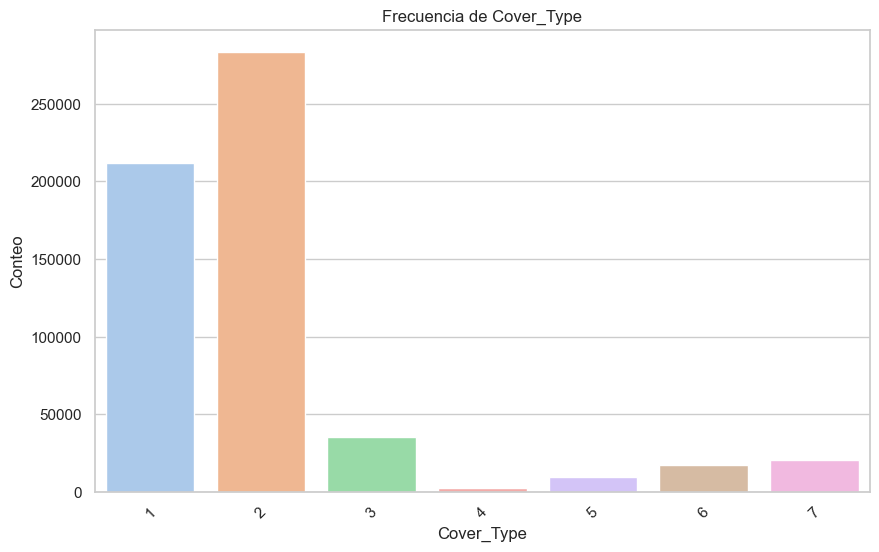

In [70]:
# Configuración general de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Identificar columnas que no sean Soil_Type ni Wilderness_Area
excluded_columns = [col for col in data.columns if col.startswith('Soil_Type') or col.startswith('Wilderness_Area')]
columns_to_plot = [col for col in data.columns if col not in excluded_columns]

# Graficar todas las columnas restantes
for col in columns_to_plot:
    plt.figure()

    # Verificar si la columna tiene pocos valores únicos (categórica)
    if data[col].nunique() < 20:
        sns.countplot(x=data[col], palette='pastel')
        plt.title(f'Frecuencia de {col}')
        plt.xlabel(col)
        plt.ylabel('Conteo')
    else:  # Si no, graficar como numérica
        sns.histplot(data[col], kde=True, bins=30, color='blue', alpha=0.7)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')

    plt.xticks(rotation=45)
    plt.show()




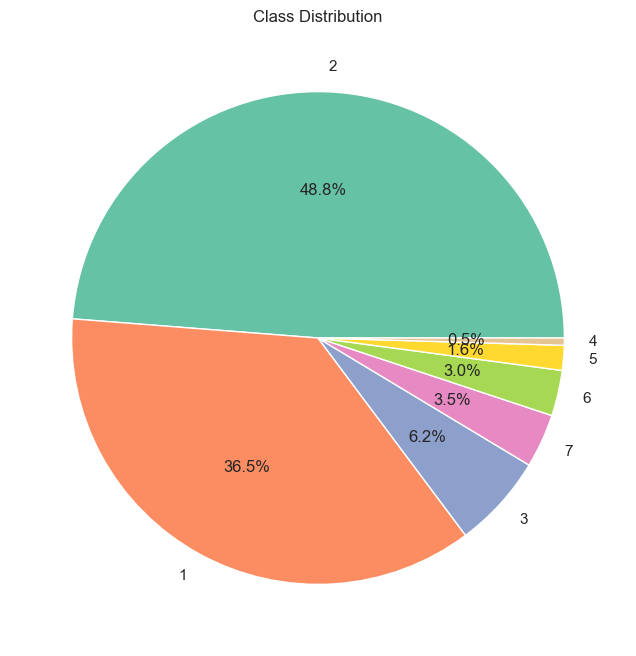

In [71]:
#HAY DATOS DESBALANCEADOS
cmap = sns.color_palette('Set2', as_cmap=True)(np.arange(7))

plt.figure(figsize=(8, 8))
plt.pie(
    data['Cover_Type'].value_counts().values,
    colors=cmap,
    labels=data['Cover_Type'].value_counts().keys(),
    autopct='%.1f%%'
)
plt.title("Class Distribution")
plt.show()

In [72]:
selected_columns = [
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am'
]


# Crear un nuevo DataFrame con las muestras y las características seleccionadas
data1 = data[selected_columns]
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']



Las 7 mejores características para entrenar son:
Elevation                          NaN
Aspect                             NaN
Slope                              NaN
Horizontal_Distance_To_Hydrology   NaN
Vertical_Distance_To_Hydrology     NaN
Horizontal_Distance_To_Roadways    NaN
Hillshade_9am                      NaN
dtype: float64


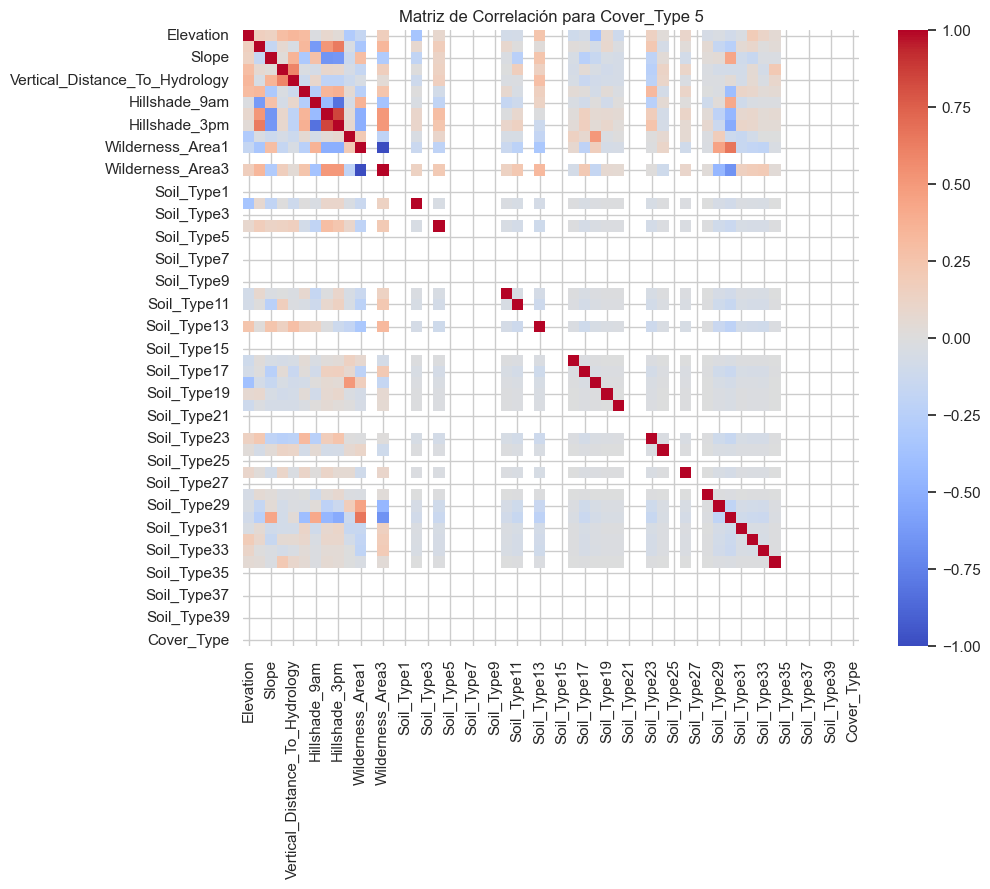

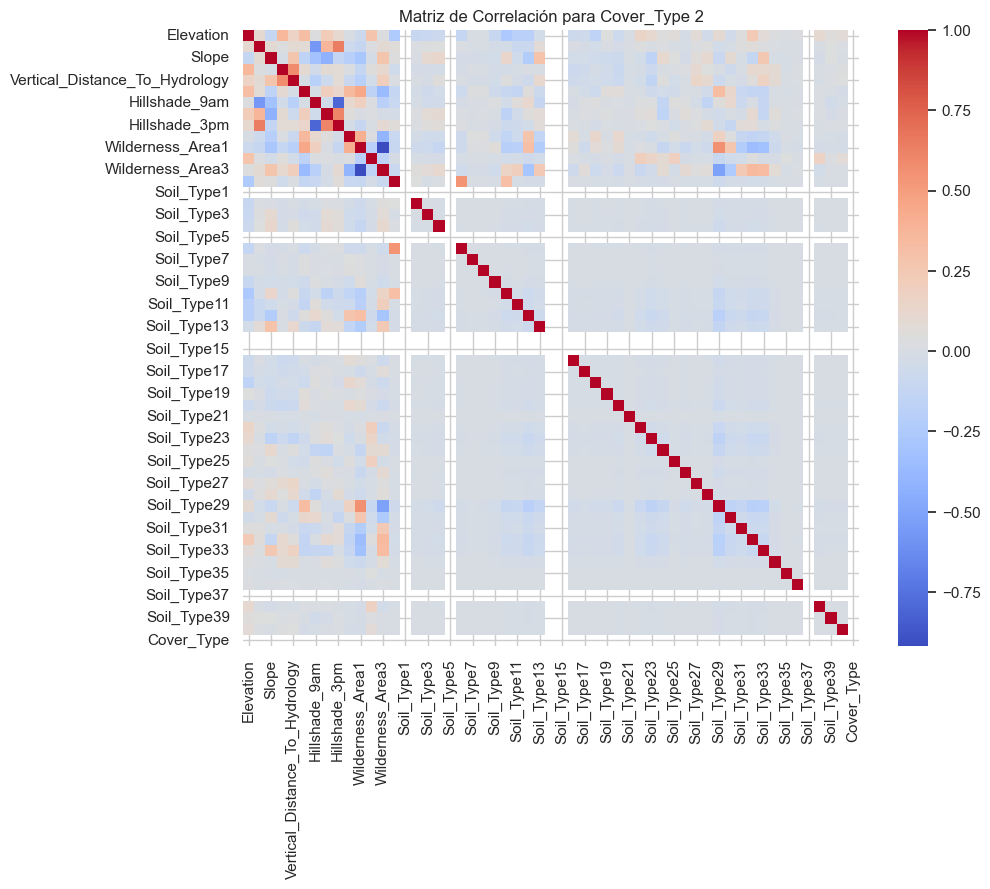

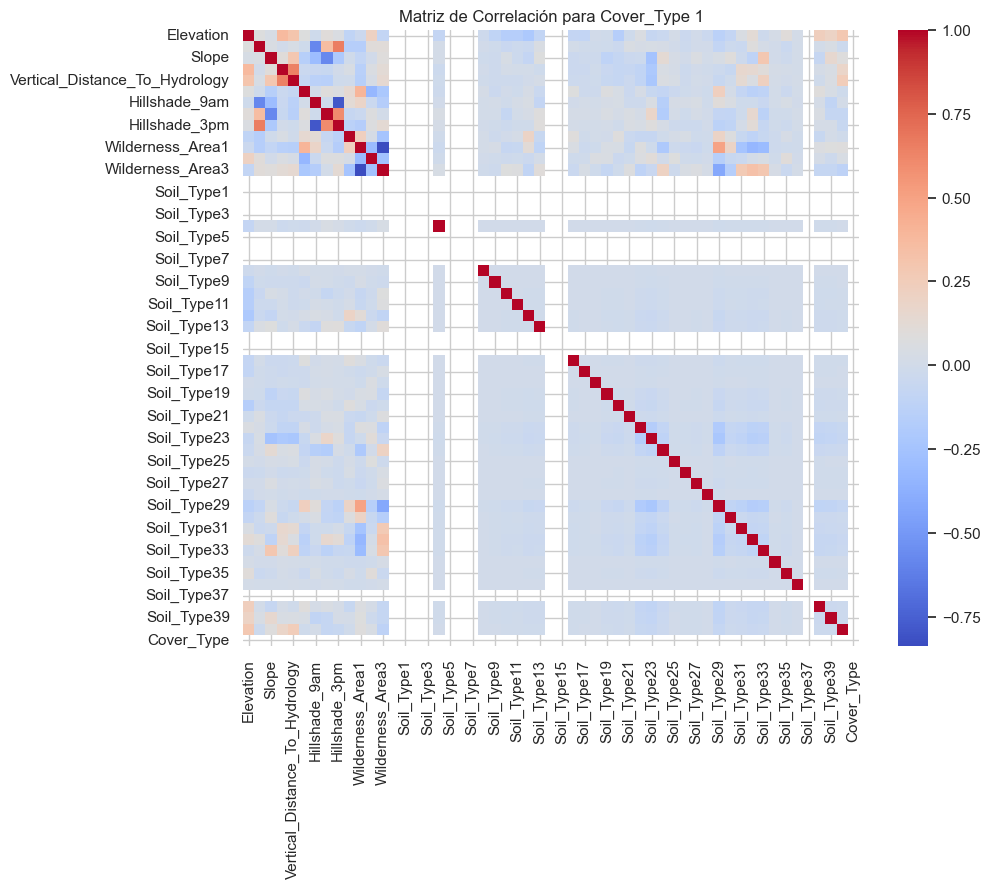

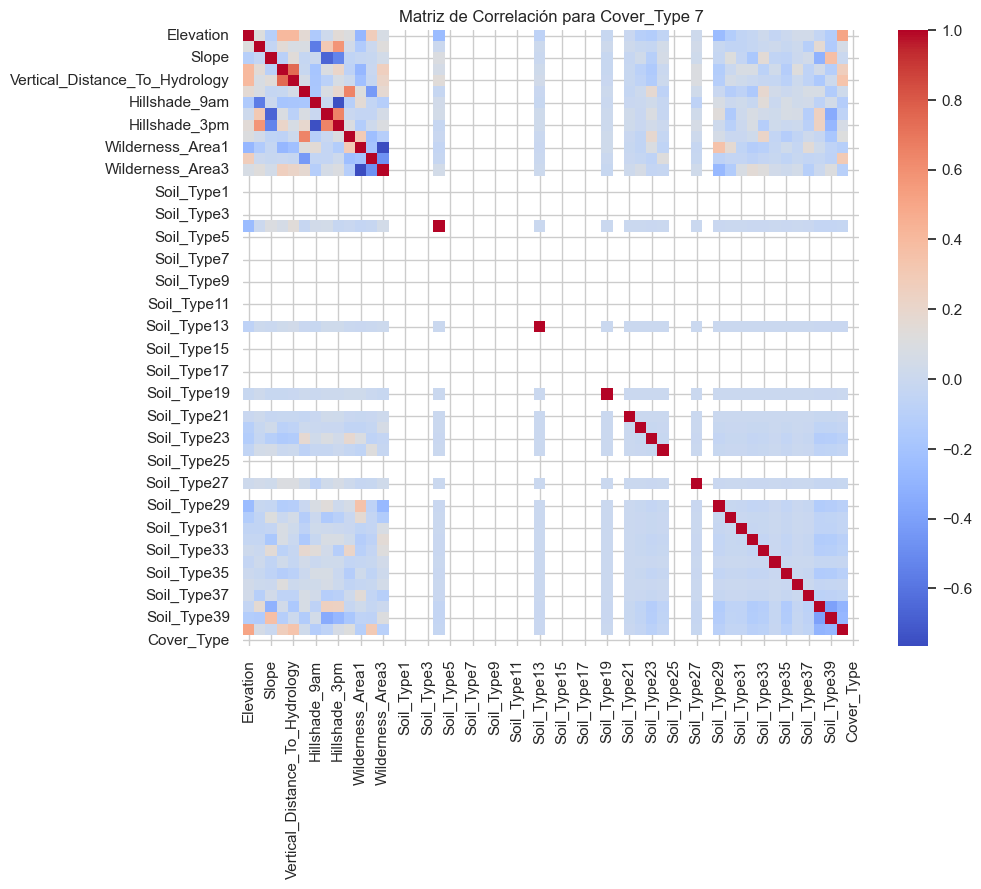

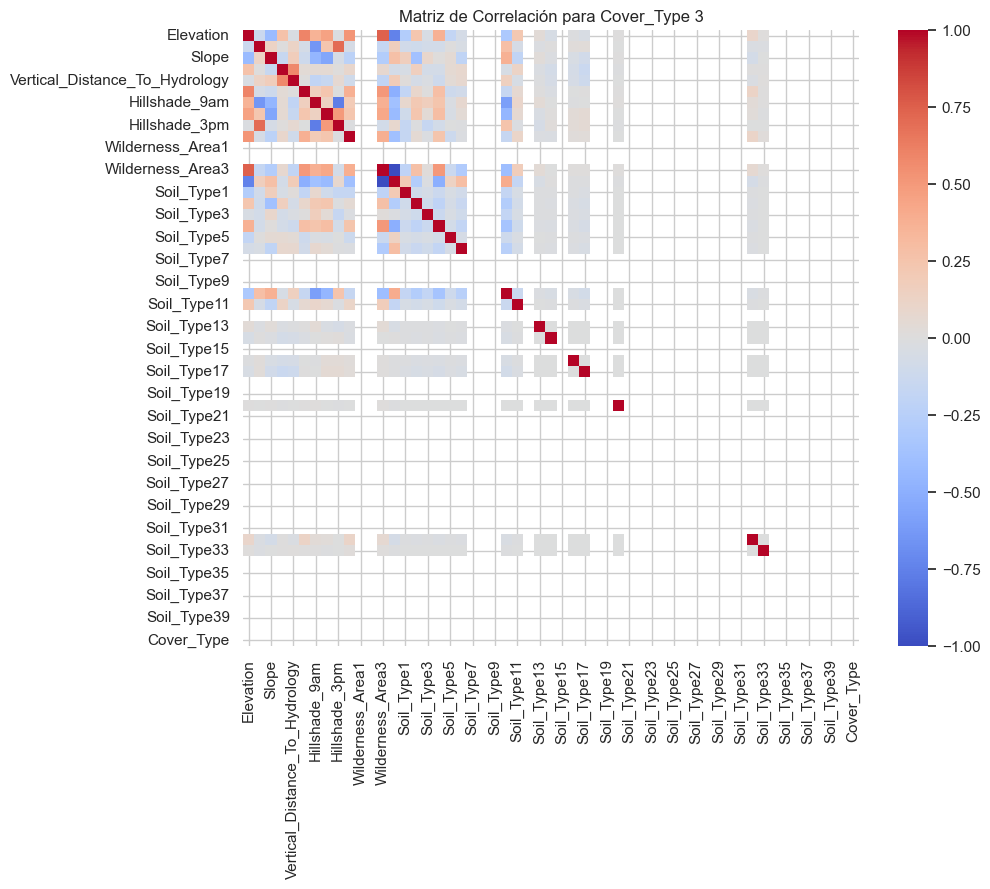

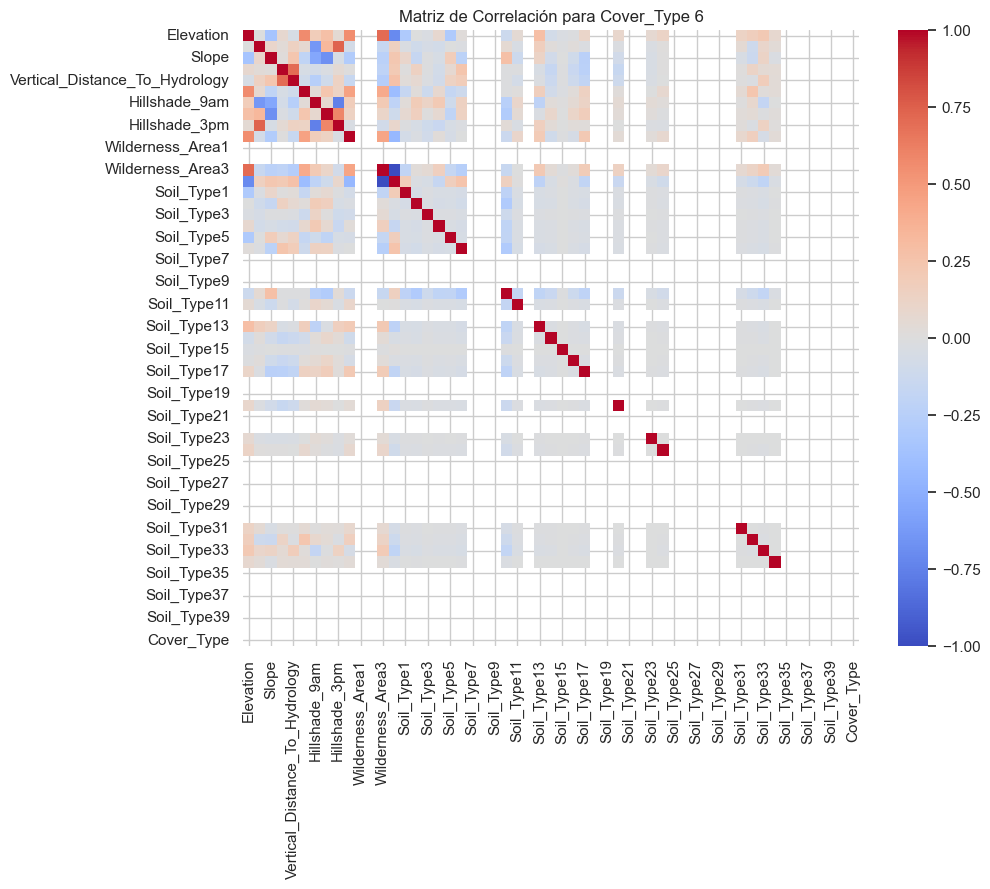

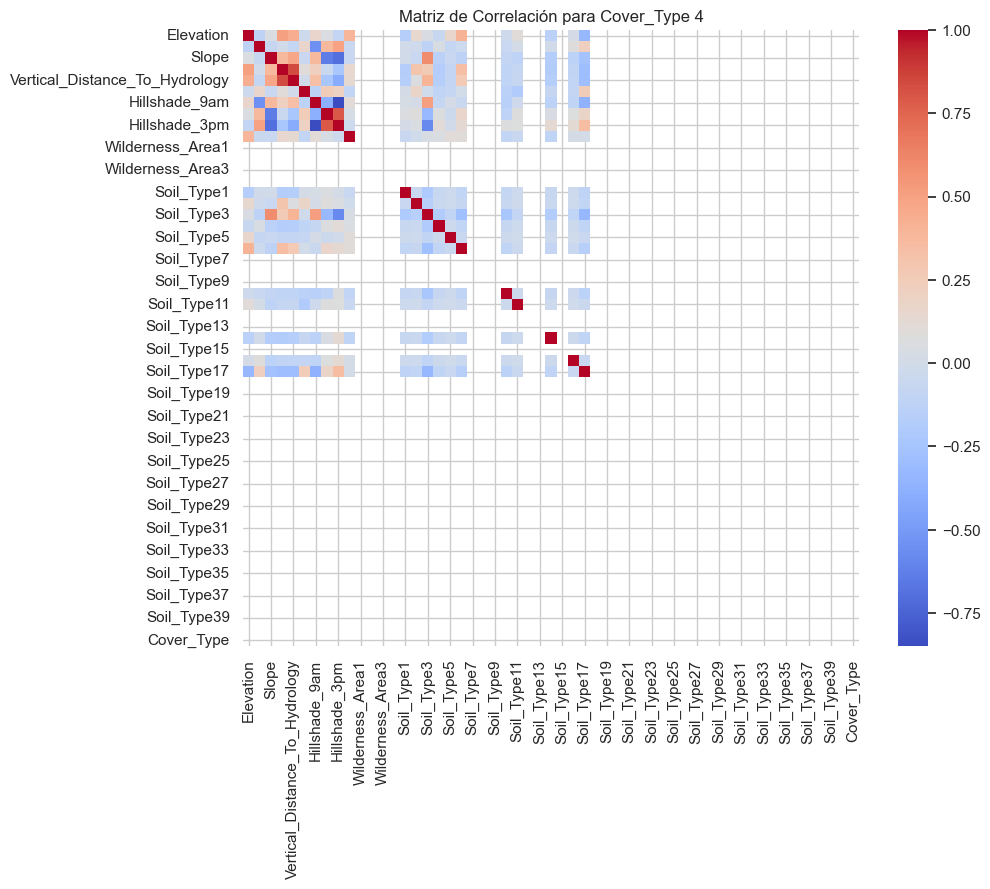

In [73]:
#Matriz de correlación
# Agrupar el dataset por Cover_Type
categories = data['Cover_Type'].unique()

# Diccionario para guardar las correlaciones por categoría
category_correlations = {}

# Crear una matriz de correlación para cada categoría
for category in categories:
    # Filtrar datos por categoría
    subset = data[data['Cover_Type'] == category]
    
    # Calcular la matriz de correlación
    corr_matrix = subset.corr()
    
    # Guardar las correlaciones de Cover_Type con las demás características
    target_corr = corr_matrix['Cover_Type'].drop('Cover_Type').abs().sort_values(ascending=False)
    category_correlations[category] = target_corr
    
    # Plotear la matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar=True, square=True)
    plt.title(f'Matriz de Correlación para Cover_Type {category}')
   # plt.show()

# Identificar las mejores características considerando todas las categorías
top_features = pd.concat(category_correlations.values(), axis=1).mean(axis=1).sort_values(ascending=False)
best_features = top_features.head(7)  # Seleccionar las 7 mejores características

print("Las 7 mejores características para entrenar son:")
print(best_features)

In [74]:
# Función de submuestreo con PCA
def undersample(data):
    # Combinar características y objetivo
    combined = pd.concat([X, y], axis=1)
    # Clase minoritaria (determinada automáticamente)
    min_class_size = combined['Cover_Type'].value_counts().min()
    # Submuestreo de cada clase
    balanced_data = combined.groupby('Cover_Type', group_keys=False).apply(
        lambda x: x.sample(min_class_size, random_state=42)
    )
    return balanced_data.drop('Cover_Type', axis=1), balanced_data['Cover_Type'], 

def oversample_with_smote(X, y):
    smote = SMOTE(random_state=42, sampling_strategy='auto')
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

In [76]:
#X_buena,Y_buena=undersample(data1)
X_buena,Y_buena= oversample_with_smote(data1,y)

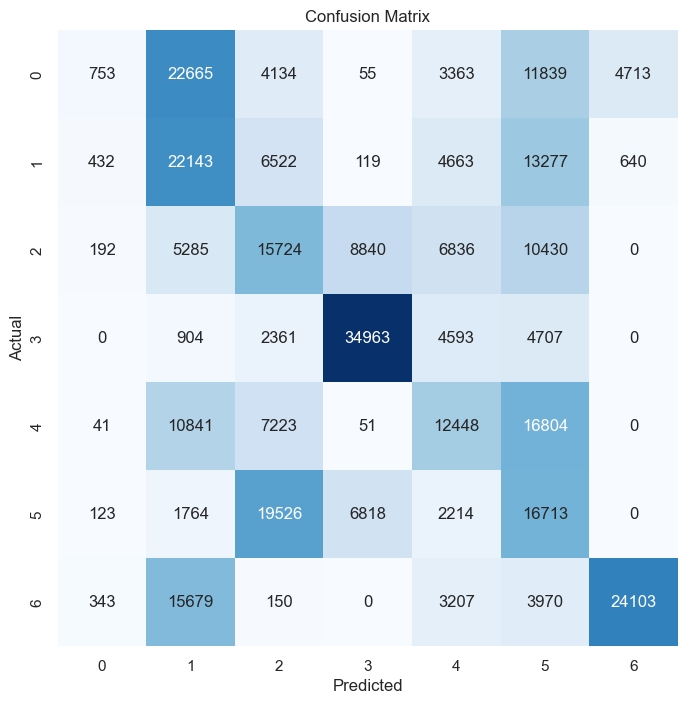

Classification Report:
----------------------
               precision    recall  f1-score   support

           1       0.40      0.02      0.03     47522
           2       0.28      0.46      0.35     47796
           3       0.28      0.33      0.31     47307
           4       0.69      0.74      0.71     47528
           5       0.33      0.26      0.29     47408
           6       0.21      0.35      0.27     47158
           7       0.82      0.51      0.63     47452

    accuracy                           0.38    332171
   macro avg       0.43      0.38      0.37    332171
weighted avg       0.43      0.38      0.37    332171



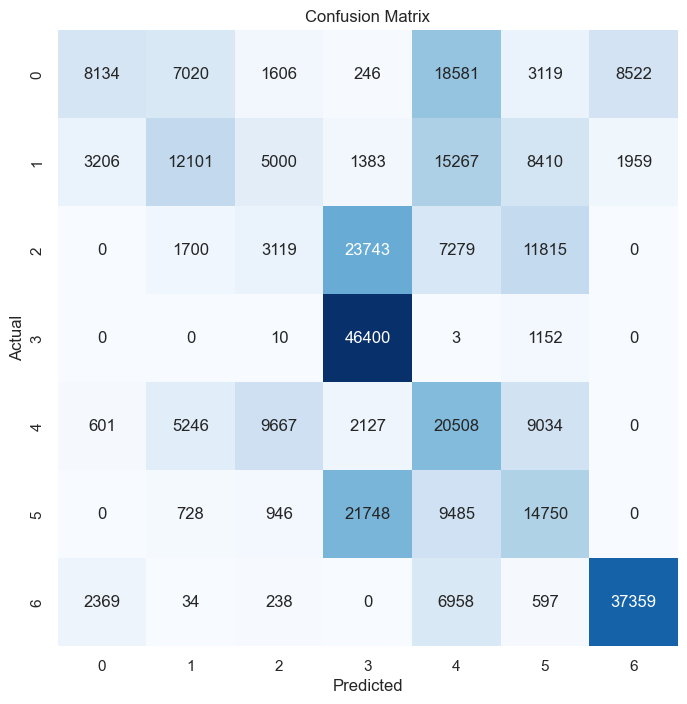

Classification Report:
----------------------
               precision    recall  f1-score   support

           1       0.57      0.17      0.26     47228
           2       0.45      0.26      0.33     47326
           3       0.15      0.07      0.09     47656
           4       0.49      0.98      0.65     47565
           5       0.26      0.43      0.33     47183
           6       0.30      0.31      0.31     47657
           7       0.78      0.79      0.78     47555

    accuracy                           0.43    332170
   macro avg       0.43      0.43      0.39    332170
weighted avg       0.43      0.43      0.39    332170



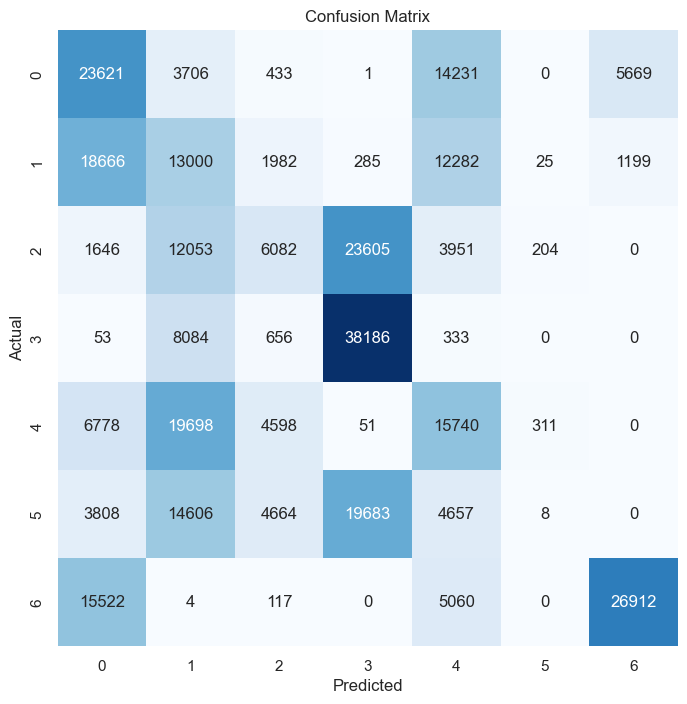

Classification Report:
----------------------
               precision    recall  f1-score   support

           1       0.34      0.50      0.40     47661
           2       0.18      0.27      0.22     47439
           3       0.33      0.13      0.18     47541
           4       0.47      0.81      0.59     47312
           5       0.28      0.33      0.30     47176
           6       0.01      0.00      0.00     47426
           7       0.80      0.57      0.66     47615

    accuracy                           0.37    332170
   macro avg       0.34      0.37      0.34    332170
weighted avg       0.34      0.37      0.34    332170



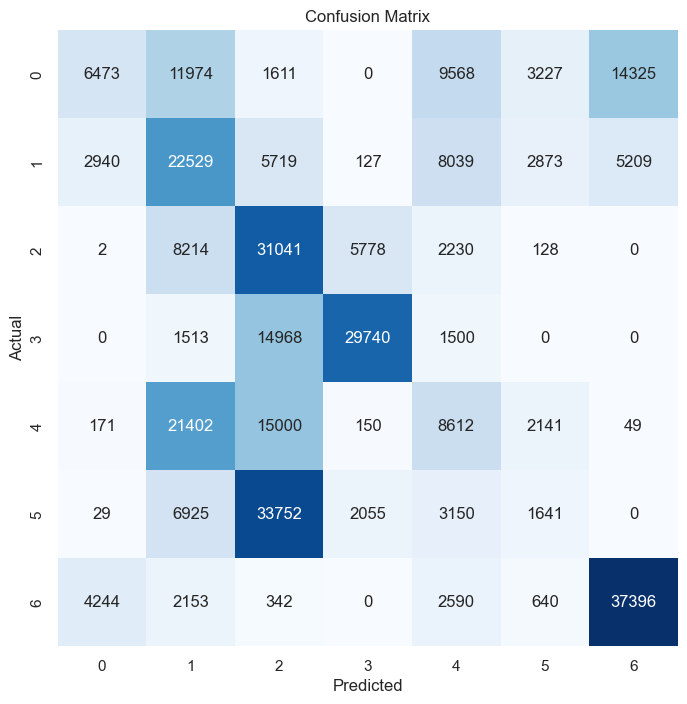

Classification Report:
----------------------
               precision    recall  f1-score   support

           1       0.47      0.14      0.21     47178
           2       0.30      0.47      0.37     47436
           3       0.30      0.65      0.41     47393
           4       0.79      0.62      0.70     47721
           5       0.24      0.18      0.21     47525
           6       0.15      0.03      0.06     47552
           7       0.66      0.79      0.72     47365

    accuracy                           0.41    332170
   macro avg       0.42      0.41      0.38    332170
weighted avg       0.42      0.41      0.38    332170

Accuracy mitjana (52folds): 0.40
Accuracy per cada fold: [0.38187258972035487, 0.4286088448685914, 0.3719450883583707, 0.41373995243399464]


In [53]:


X_train, X_test, y_train, y_test = train_test_split(
    X_buena, Y_buena, test_size=0.33, random_state=42
)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)  # Escala todas las característic
X_scaled_df = pd.DataFrame(X_scaled, index=X_train.index, columns=X_train.columns)


model= Perceptron(tol=1e-9, random_state=42)
# Avaluació inicial amb k-folds



mean_accuracy, fold_accuracies, model = cross_validate(model, X_scaled_df, y_train, 4)
print(f"Accuracy mitjana (52folds): {mean_accuracy:.2f}")
print("Accuracy per cada fold:", fold_accuracies)


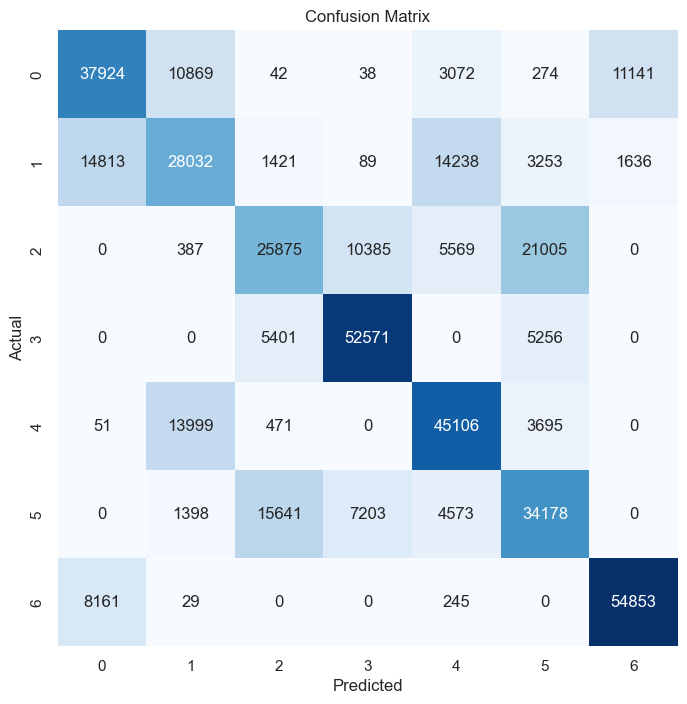

Classification Report:
----------------------
               precision    recall  f1-score   support

           1       0.62      0.60      0.61     63360
           2       0.51      0.44      0.47     63482
           3       0.53      0.41      0.46     63221
           4       0.75      0.83      0.79     63228
           5       0.62      0.71      0.66     63322
           6       0.51      0.54      0.52     62993
           7       0.81      0.87      0.84     63288

    accuracy                           0.63    442894
   macro avg       0.62      0.63      0.62    442894
weighted avg       0.62      0.63      0.62    442894



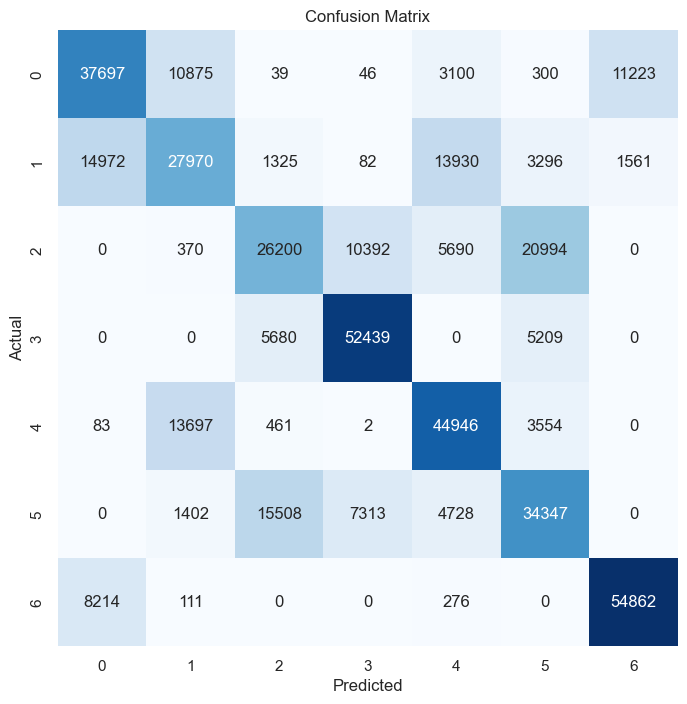

Classification Report:
----------------------
               precision    recall  f1-score   support

           1       0.62      0.60      0.61     63280
           2       0.51      0.44      0.48     63136
           3       0.53      0.41      0.46     63646
           4       0.75      0.83      0.79     63328
           5       0.62      0.72      0.66     62743
           6       0.51      0.54      0.52     63298
           7       0.81      0.86      0.84     63463

    accuracy                           0.63    442894
   macro avg       0.62      0.63      0.62    442894
weighted avg       0.62      0.63      0.62    442894



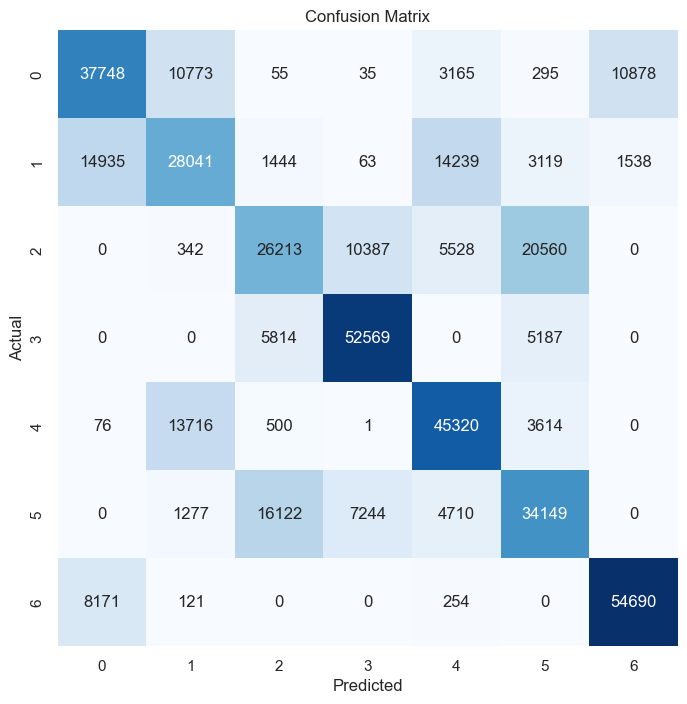

Classification Report:
----------------------
               precision    recall  f1-score   support

           1       0.62      0.60      0.61     62949
           2       0.52      0.44      0.48     63379
           3       0.52      0.42      0.46     63030
           4       0.75      0.83      0.79     63570
           5       0.62      0.72      0.66     63227
           6       0.51      0.54      0.52     63502
           7       0.81      0.86      0.84     63236

    accuracy                           0.63    442893
   macro avg       0.62      0.63      0.62    442893
weighted avg       0.62      0.63      0.62    442893

Accuracy mitjana (52folds): 0.63
Accuracy per cada fold: [0.628906690991524, 0.6287305766165268, 0.6293393663932372]


In [54]:
#Regresión logística
#Dibujado de gráficos



model= LogisticRegression(max_iter=1000)
# Avaluació inicial amb k-folds



mean_accuracy, fold_accuracies, model = cross_validate(model, X_scaled_df, y_train, 3)
print(f"Accuracy mitjana (52folds): {mean_accuracy:.2f}")
print("Accuracy per cada fold:", fold_accuracies)


In [55]:


#Ahora vamos a hacer SVM
# Provar diferents valors de C
X_undersample,y_undersample=undersample(data1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_undersample, y_undersample, test_size=0.33, random_state=42
)

#print(y_undersample.value_counts())

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train1.columns, index=X_train1.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test1.columns, index=X_test1.index)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [1e-4, 1e-3, 1e-2, 0.1, 1],
    
}


C:\Users\reyra\AppData\Local\Temp\ipykernel_17448\3077440482.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_data = combined.groupby('Cover_Type', group_keys=False).apply(


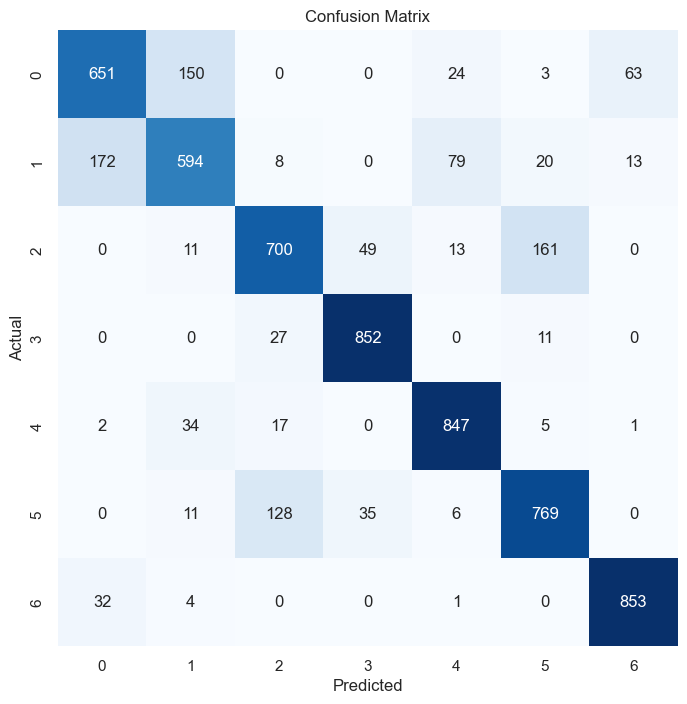

Classification Report:
----------------------
               precision    recall  f1-score   support

           1       0.76      0.73      0.74       891
           2       0.74      0.67      0.70       886
           3       0.80      0.75      0.77       934
           4       0.91      0.96      0.93       890
           5       0.87      0.93      0.90       906
           6       0.79      0.81      0.80       949
           7       0.92      0.96      0.94       890

    accuracy                           0.83      6346
   macro avg       0.83      0.83      0.83      6346
weighted avg       0.83      0.83      0.83      6346



{'C': 10, 'gamma': 0.1}

In [56]:
grid_search = GridSearchCV(svm(kernel='rbf'), param_grid, cv=3, scoring='accuracy',n_jobs=-1)

    
grid_search.fit(X_train_scaled, y_train1)

prd1=grid_search.predict(X_test_scaled)
cm = confusion_matrix(y_test1, prd1)
        
    
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
    
print("Classification Report:\n----------------------\n", classification_report(y_test1,prd1, zero_division=0))
cm = confusion_matrix(y_test1, prd1)

grid_search.best_params_


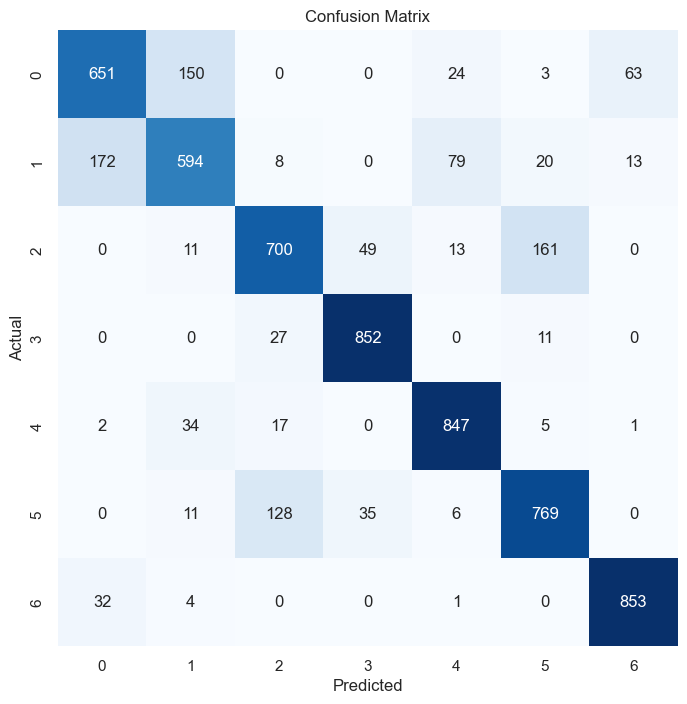

Classification Report:
----------------------
               precision    recall  f1-score   support

           1       0.68      0.68      0.68       891
           2       0.63      0.60      0.62       886
           3       0.76      0.74      0.75       934
           4       0.91      0.93      0.92       890
           5       0.87      0.89      0.88       906
           6       0.78      0.78      0.78       949
           7       0.90      0.92      0.91       890

    accuracy                           0.79      6346
   macro avg       0.79      0.79      0.79      6346
weighted avg       0.79      0.79      0.79      6346



{'max_depth': 25}

In [57]:
#Arboles de decisión

param_grid = {
    'max_depth': [5,20,25,30,40,50,100,None]
}
# Predecir y evaluar
grid_search = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=42) , param_grid, cv=3, scoring='accuracy',n_jobs=-1)


grid_search.fit(X_train_scaled, y_train1)
prd2=grid_search.predict(X_test_scaled)

      
    
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
    
print("Classification Report:\n----------------------\n", classification_report(y_test1,prd2, zero_division=0))
cm = confusion_matrix(y_test1, prd2)

grid_search.best_params_




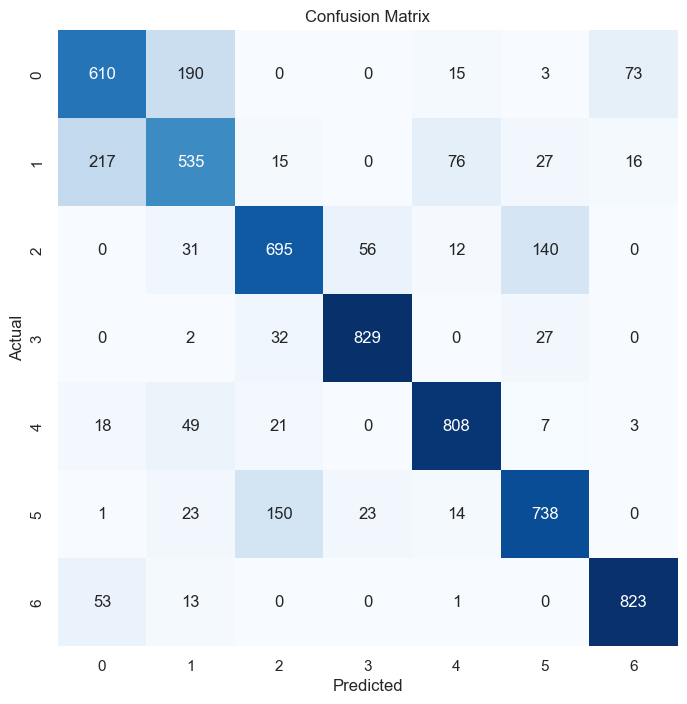

Classification Report:
----------------------
               precision    recall  f1-score   support

           1       0.77      0.77      0.77       891
           2       0.80      0.69      0.74       886
           3       0.86      0.82      0.84       934
           4       0.92      0.98      0.95       890
           5       0.90      0.96      0.93       906
           6       0.87      0.88      0.87       949
           7       0.93      0.97      0.95       890

    accuracy                           0.87      6346
   macro avg       0.86      0.87      0.86      6346
weighted avg       0.86      0.87      0.86      6346



"\nCódigo inicial de prueba\n\n#RandomForest\n\n\nparam_grid = {\n    'n_estimators': [10, 100, 150, 200, 500,1000],\n    'max_depth': [5,20,25,30,40,45,50,None],\n    'criterion': ['gini','entropy']\n}\n# Predecir y evaluar\ngrid_search = GridSearchCV( RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, class_weight='balanced'), param_grid, cv=3,\n                           scoring='accuracy', n_jobs=-1)\n\ngrid_search.fit(X_train_scaled, y_train1)\n\nprint(classification_report(y_test1, grid_search.predict(X_test_scaled), zero_division=0))\ngrid_search.best_params_\n\n"

In [58]:
#RandomForest


param_grid = {
    'n_estimators': [500,1000],
    'max_depth': [5,20,25,30,40,45,50,None],
    'criterion': ['gini','entropy']
}
# Predecir y evaluar
grid_search = GridSearchCV( RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, class_weight='balanced'), param_grid, cv=3,
                           scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train1)
pr_randomfor=grid_search.predict(X_test_scaled)
          
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
    
print("Classification Report:\n----------------------\n", classification_report(y_test1,pr_randomfor, zero_division=0))
cm = confusion_matrix(y_test1, pr_randomfor)

grid_search.best_params_


"""
Código inicial de prueba

#RandomForest


param_grid = {
    'n_estimators': [10, 100, 150, 200, 500,1000],
    'max_depth': [5,20,25,30,40,45,50,None],
    'criterion': ['gini','entropy']
}
# Predecir y evaluar
grid_search = GridSearchCV( RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, class_weight='balanced'), param_grid, cv=3,
                           scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train1)

print(classification_report(y_test1, grid_search.predict(X_test_scaled), zero_division=0))
grid_search.best_params_

"""
